In [1]:
setwd("/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts")
suppressPackageStartupMessages(library(tximeta))
suppressPackageStartupMessages(library(SummarizedExperiment))
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(source("tree_helper_function.R"))


In [11]:
metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505/SRR_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$TissueName))
colData <- colData[colData$files!="/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100/SRR5758681/quant.sf",]
seMuscle <- tximeta::tximeta(colData)

In [41]:
dds <- DESeqDataSet(seMuscle, design=~condition)
dds <- estimateSizeFactors(dds)
dds <- dds[rowSums(assays(seMuscle)[["counts"]]) > 10,]
vsd <- vst(dds)

using counts and average transcript lengths from tximeta

using 'avgTxLength' from assays(dds), correcting for library size



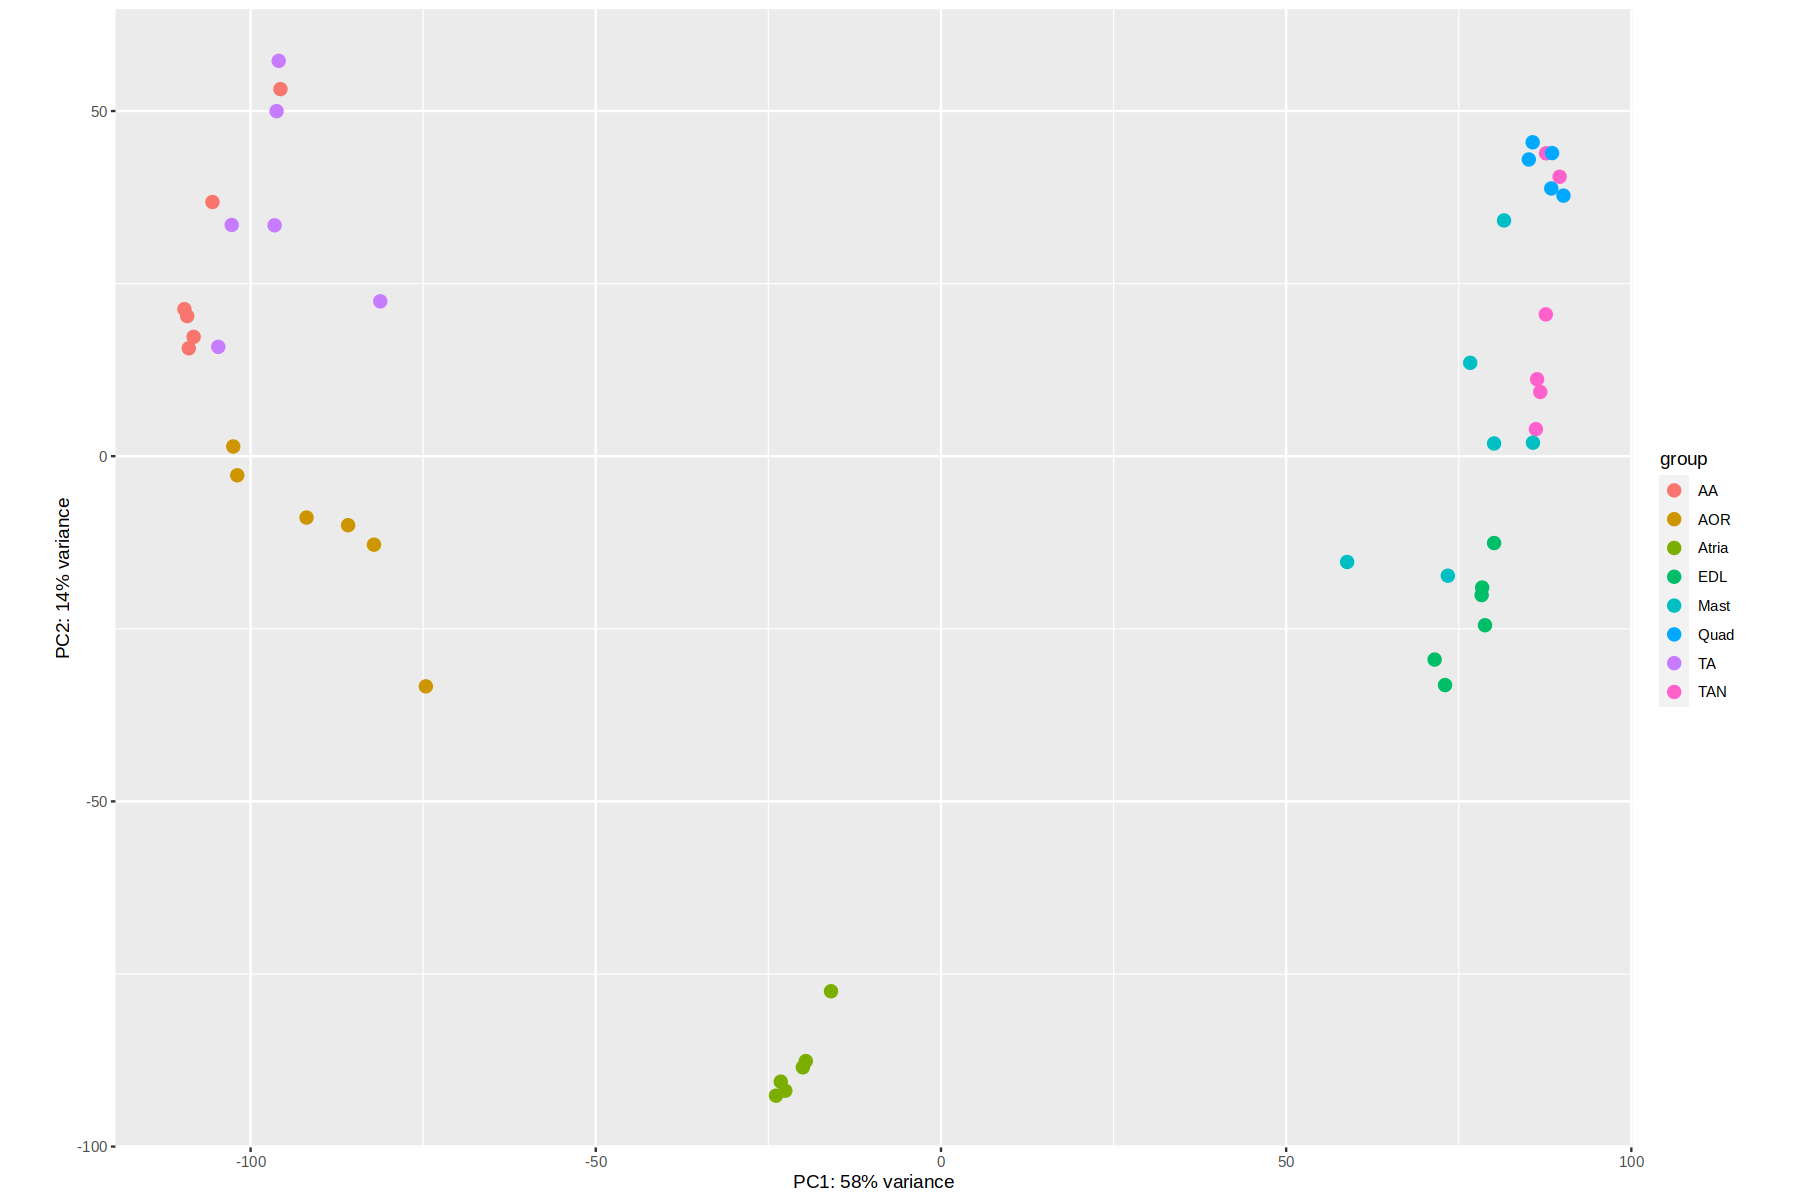

In [15]:
options(repr.plot.width=15, repr.plot.height=10)
plotPCA(vsd, intgroup=c("condition"), ntop=1000)

In [39]:
y <- scaleInfReps(seMuscle)
y <- labelKeep(y)

[1] 13452

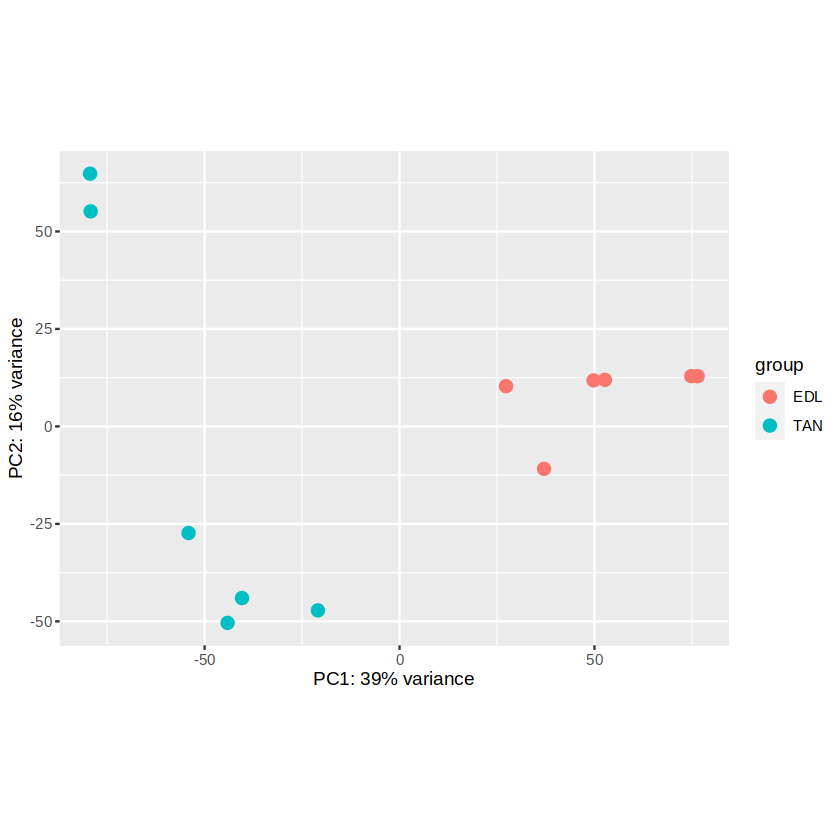

In [42]:
options(repr.plot.width=7, repr.plot.height=7)
y2 <- y[,colData(y)[["condition"]] %in% c("EDL", "TAN")]
colData(y2)[["condition"]] <- as.factor(as.character(colData(y2)[["condition"]]))
plotPCA(vsd[,colData(y)[["condition"]] %in% c("EDL", "TAN")], intgroup=c("condition"), ntop=1000)
y2 <- swish(y2, x="condition")
sum(mcols(y2)[["qvalue"]] < 0.1, na.rm=T)

[1] 28314

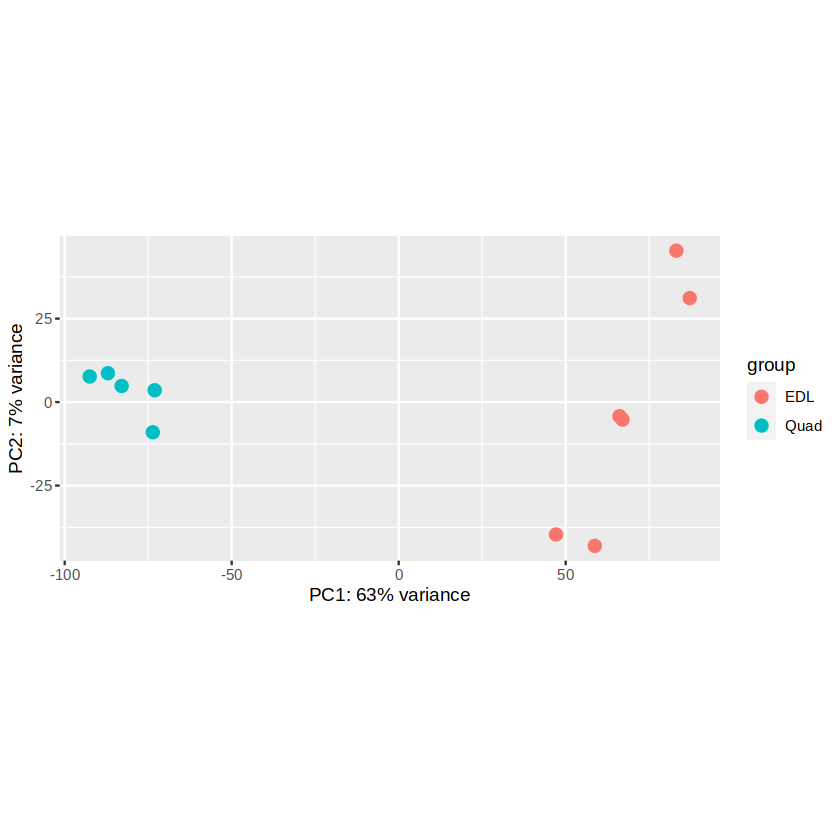

In [43]:
options(repr.plot.width=7, repr.plot.height=7)
y2 <- y[,colData(y)[["condition"]] %in% c("Quad", "EDL")]
colData(y2)[["condition"]] <- as.factor(as.character(colData(y2)[["condition"]]))
plotPCA(vsd[,colData(y)[["condition"]] %in% c("Quad", "EDL")], intgroup=c("condition"), ntop=1000)
y2 <- swish(y2, x="condition")
sum(mcols(y2)[["qvalue"]] < 0.1, na.rm=T)

[1] 21514

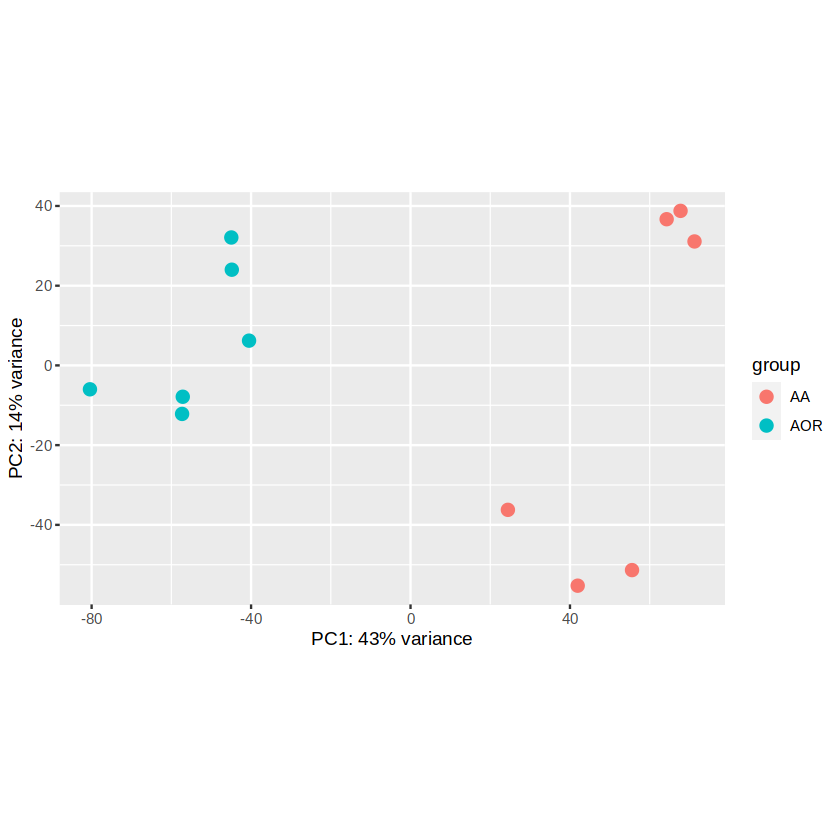

In [44]:
options(repr.plot.width=7, repr.plot.height=7)
y2 <- y[,colData(y)[["condition"]] %in% c("AOR", "AA")]
colData(y2)[["condition"]] <- as.factor(as.character(colData(y2)[["condition"]]))
plotPCA(vsd[,colData(y)[["condition"]] %in% c("AOR", "AA")], intgroup=c("condition"), ntop=1000)
y2 <- swish(y2, x="condition")
sum(mcols(y2)[["qvalue"]] < 0.1, na.rm=T)

[1] 21145

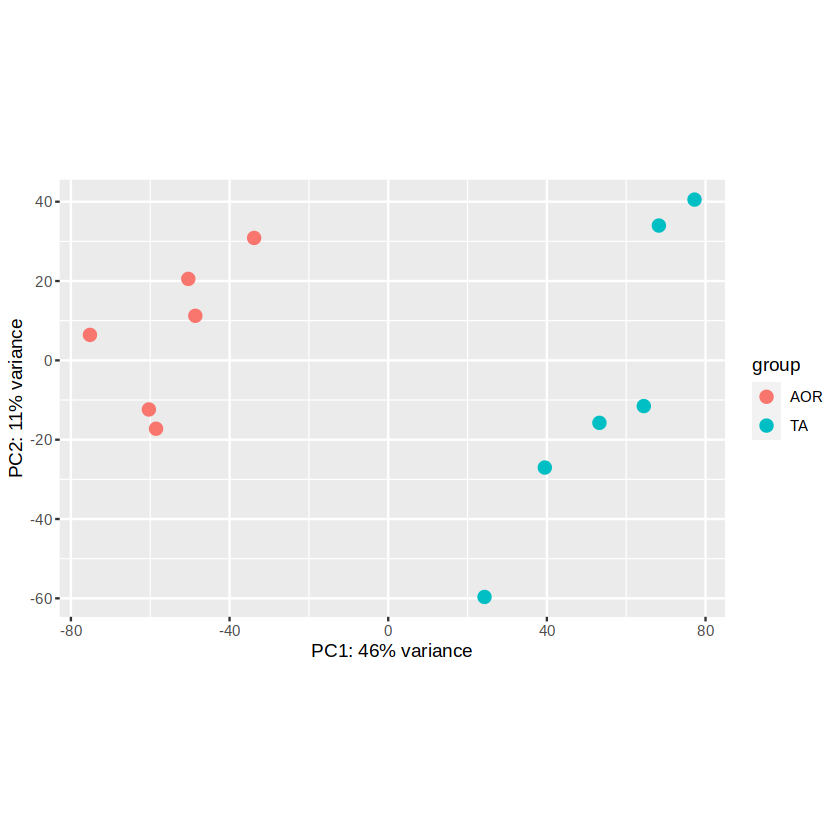

In [45]:
y2 <- y[,colData(y)[["condition"]] %in% c("AOR", "TA")]
colData(y2)[["condition"]] <- as.factor(as.character(colData(y2)[["condition"]]))
plotPCA(vsd[,colData(y)[["condition"]] %in% c("AOR", "TA")], intgroup=c("condition"), ntop=1000)
y2 <- swish(y2, x="condition")
sum(mcols(y2)[["qvalue"]] < 0.1, na.rm=T)

[1] 9310

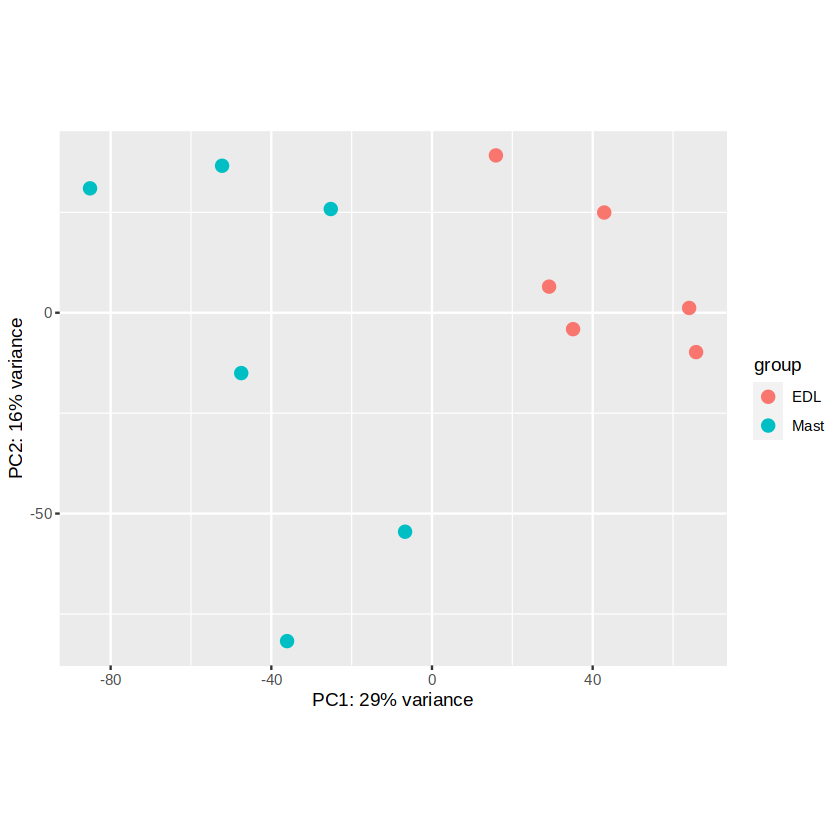

In [46]:
options(repr.plot.width=7, repr.plot.height=7)
y2 <- y[,colData(y)[["condition"]] %in% c("Mast", "EDL")]
colData(y2)[["condition"]] <- as.factor(as.character(colData(y2)[["condition"]]))
plotPCA(vsd[,colData(y)[["condition"]] %in% c("Mast", "EDL")], intgroup=c("condition"), ntop=1000)
y2 <- swish(y2, x="condition")
sum(mcols(y2)[["qvalue"]] < 0.1, na.rm=T)

In [31]:
metaData <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_heart/SRA_Acc_List.txt")
quantDir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/real_datasets/GSE100505_heart/sal_out/mode_gcbias=True/posttype=gibbs_npost=100_tf=100"
samples <- metaData$RUN
files <- file.path(quantDir, samples, "quant.sf")
colData <- cbind(data.frame(files = files, names = samples), condition = as.factor(metaData$source_name))
seHeart <- tximeta::tximeta(colData)

importing quantifications

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 


found matching transcriptome:
[ GENCODE - Mus musculus - release M25 ]

loading existing TxDb created: 2023-02-17 18:26:37

loading existing transcript ranges created: 2023-02-17 18:26:39

fetching genome info for GENCODE



In [35]:
dds <- DESeqDataSet(seHeart, design=~condition)
dds <- estimateSizeFactors(dds)
dds <- dds[rowSums(assays(seHeart)[["counts"]]) > 10,]
vsd <- vst(dds)

using counts and average transcript lengths from tximeta

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

using 'avgTxLength' from assays(dds), correcting for library size



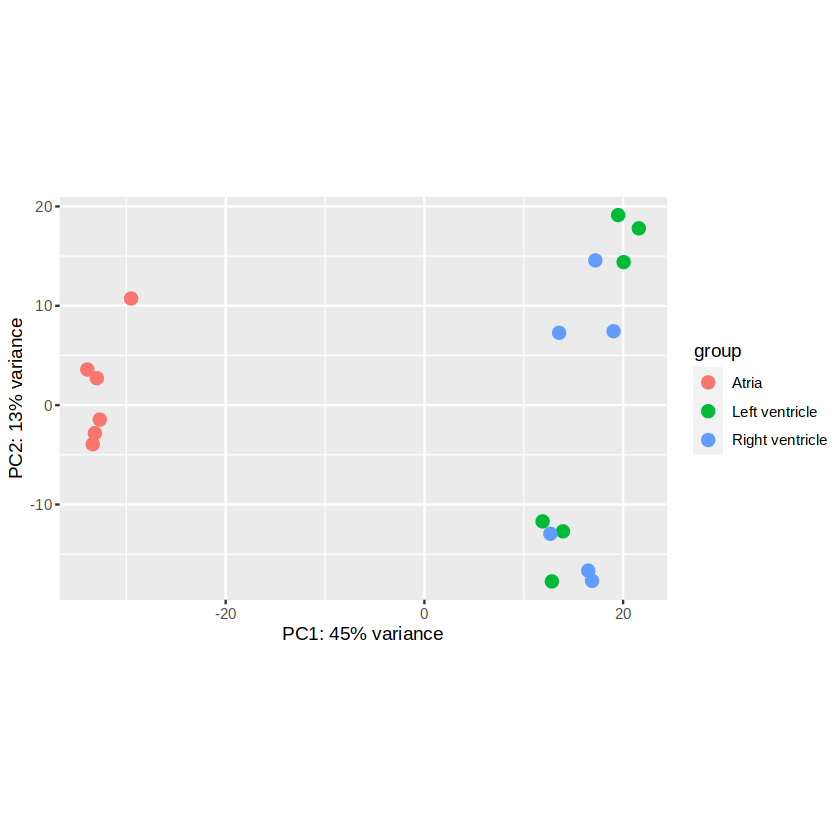

In [36]:
plotPCA(vsd, intgroup=c("condition"), ntop=1000)

[1] 15929

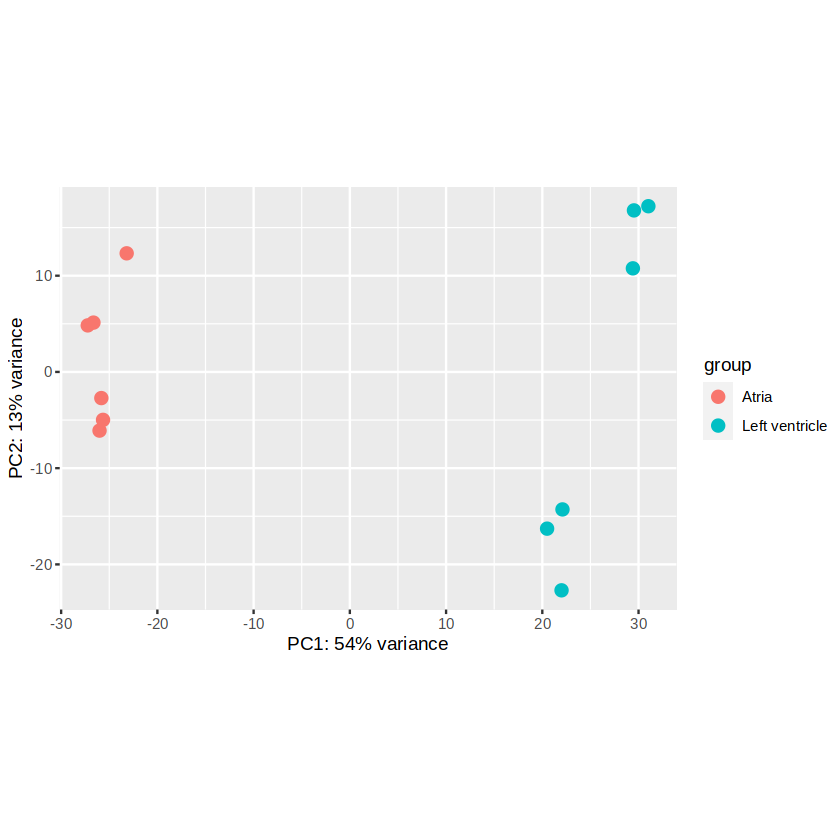

In [37]:
options(repr.plot.width=7, repr.plot.height=7)
yHeart <- scaleInfReps(seHeart)
yHeart <- labelKeep(yHeart)
y2 <- yHeart[,colData(yHeart)[["condition"]] %in% c("Atria", "Left ventricle")]
colData(y2)[["condition"]] <- as.factor(as.character(colData(y2)[["condition"]]))
plotPCA(vsd[,colData(yHeart)[["condition"]] %in% c("Atria", "Left ventricle")], intgroup=c("condition"), ntop=1000)
y2 <- swish(y2, x="condition")
sum(mcols(y2)[["qvalue"]] < 0.1, na.rm=T)